# Problem Statement

Rossmann is a European drug distributor which operates over 3,000 drug stores across seven European countries. Since a lot of drugs come with a short shelf life, that is, they do not have a long expiry date, it becomes imperative for Rossmann to accurately forecast sales at their individual stores. Currently, the forecasting is taken care of by the store managers who are tasked with forecasting daily sales for the next six weeks.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns

## Importing Data

In [2]:
# Reading the Data
train = pd.read_csv("train.csv")
store = pd.read_csv("store.csv")

In [3]:
# Checking the train data
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
# Checking train data size
train.shape

(1017209, 9)

In [5]:
# Checking types of columns and null value analysis
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


### All data points are non-null and donot require any imputation or further analysis

In [6]:
# Checking the spread of numerical columns in train data

train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [7]:
# Checking store sample data

store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [8]:
# Checking data size of store data

store.shape

(1115, 10)

In [9]:
# Checking data types and null value analysis for store data

store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


### Store data has null values we need to impute them

In [10]:
#Checking % counts of all null values

100*store.isnull().sum()/store.shape[0]

Store                         0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.269058
CompetitionOpenSinceMonth    31.748879
CompetitionOpenSinceYear     31.748879
Promo2                        0.000000
Promo2SinceWeek              48.789238
Promo2SinceYear              48.789238
PromoInterval                48.789238
dtype: float64

### Absence of promo code would mean that there was no promotions going on at the store that time, so we will impute it with zero

In [11]:
store['Promo2SinceWeek'].fillna(0, inplace=True)
store['Promo2SinceYear'].fillna(0, inplace=True)
store['PromoInterval'].fillna(0, inplace=True)

### CompetitionDistance feild has small number of null values so we impute it with its mean

In [12]:
store['CompetitionDistance'].fillna(store['CompetitionDistance'].mean(), inplace=True)

In [13]:
# Rechecking for the null values

100*store.isnull().sum()/store.shape[0]

Store                         0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.000000
CompetitionOpenSinceMonth    31.748879
CompetitionOpenSinceYear     31.748879
Promo2                        0.000000
Promo2SinceWeek               0.000000
Promo2SinceYear               0.000000
PromoInterval                 0.000000
dtype: float64

### We will analyse further and then imput null values for CompetitionOpenSinceMonth and CompetitionOpenSinceYear

## EDA

In [14]:
# We will create a function for plots

def Countplot(features, df):
    cols = 4
    rows = len(features)//cols +1
    fig = plt.figure(figsize=(16, rows*5))
    dataframe = df.copy()
    for plot, feature in enumerate(features):
        fig.add_subplot(rows, cols, plot+1)
        fig.tight_layout(h_pad =5, w_pad=5)
        dataframe[feature] = dataframe[feature].fillna('Missing')
        ax = sns.countplot(x=feature, data=dataframe, order=dataframe[feature].value_counts().index)
        plt.xticks(rotation = 90)
        plt.title("for {}".format(feature))
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,
                    height + 3,
                    '{:1.2f}'.format(height/len(dataframe) * 180),
                    ha = 'center')

## Univariate Data Analysis on datasets

### For Store Data

In [15]:
# Categorical feilds of Store Data

store_categorical_feilds=['StoreType', 'Assortment', 'CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval']

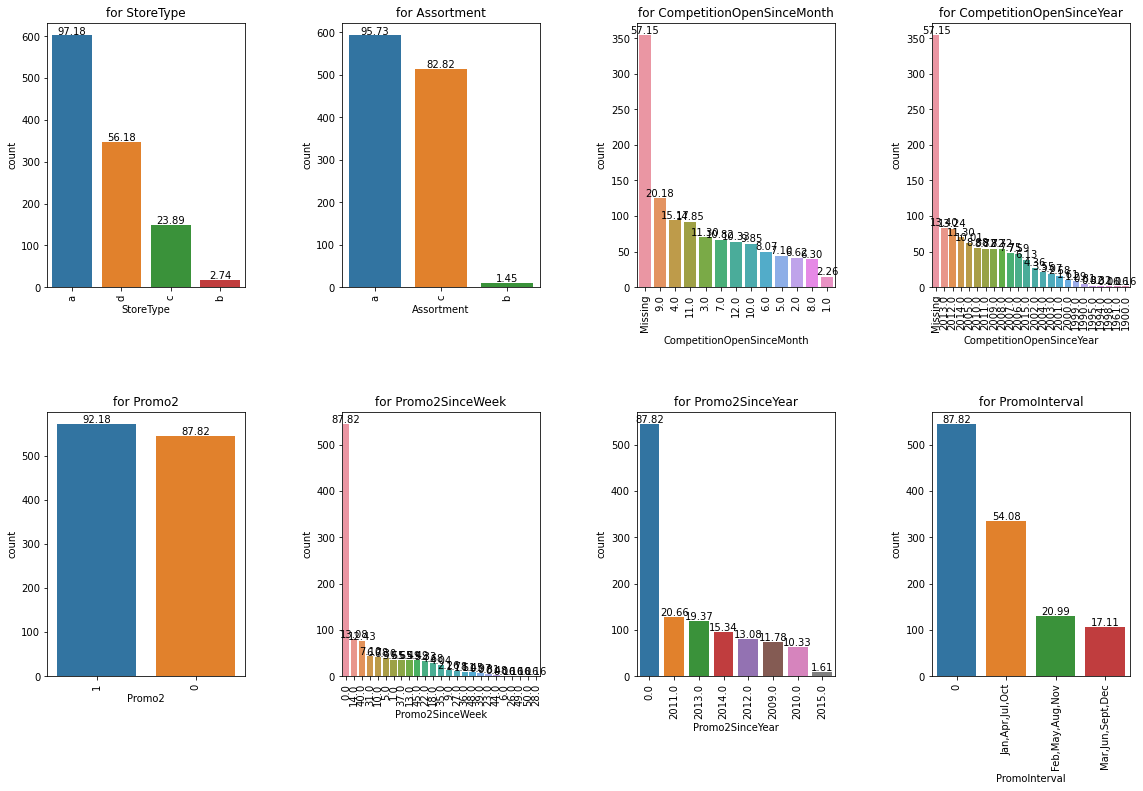

In [16]:
# Count plots for store data

Countplot(store_categorical_feilds, store)

### Inferences on Store Data

Majority of stores are of type A stores.(54%)

Majority of stores have type A of assortments, other type of assortments are low.

Data for competition is null for 31% of the stores which means there is either no competition for those stores or data is missing.

48% of the stores dont have promotions, promo2 in the store.

Promotions are concentrated in the months of Jan, Apr, Jul, Oct.

## For Train Data

In [17]:
# Categorical variables in Train data

train_categorical_fields=['DayOfWeek','Open', 'Promo', 'StateHoliday', 'SchoolHoliday']

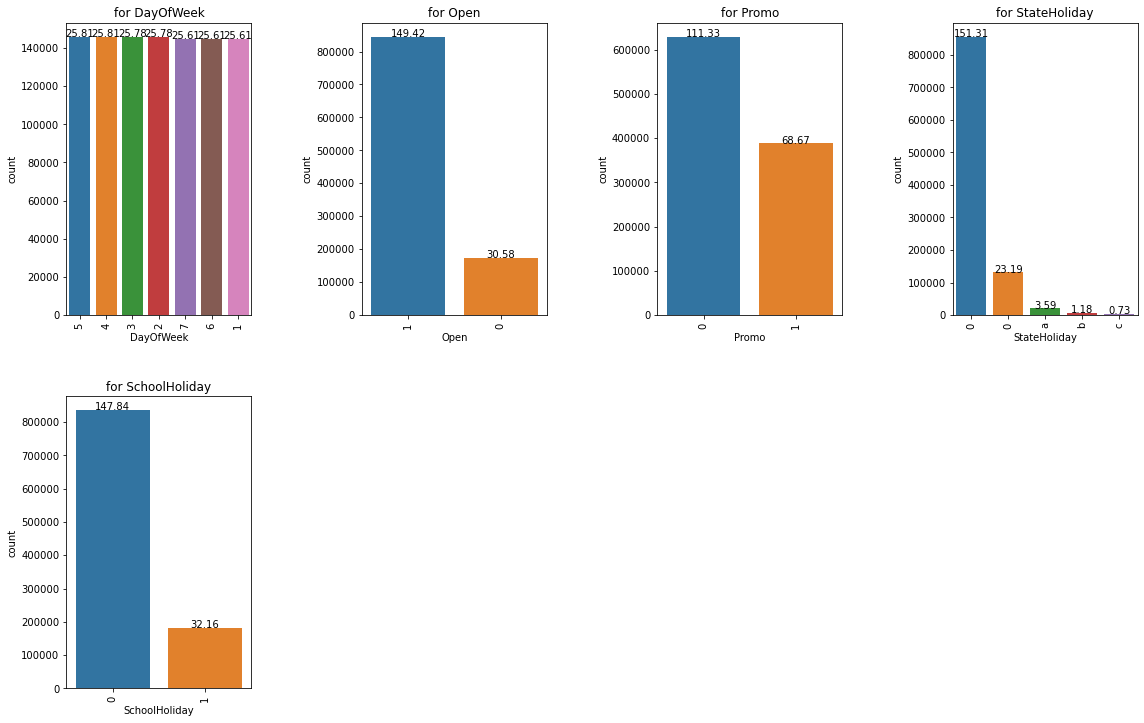

In [18]:
# Count plots for Train data

Countplot(train_categorical_fields,train)

## Inferences from the train data

All days of the week have equal contribution.

Stores are closed for only 17% data points.

Promotions are ative on only 38% data paoints


# Box plot and outlier analysis on both data sets

## For store data

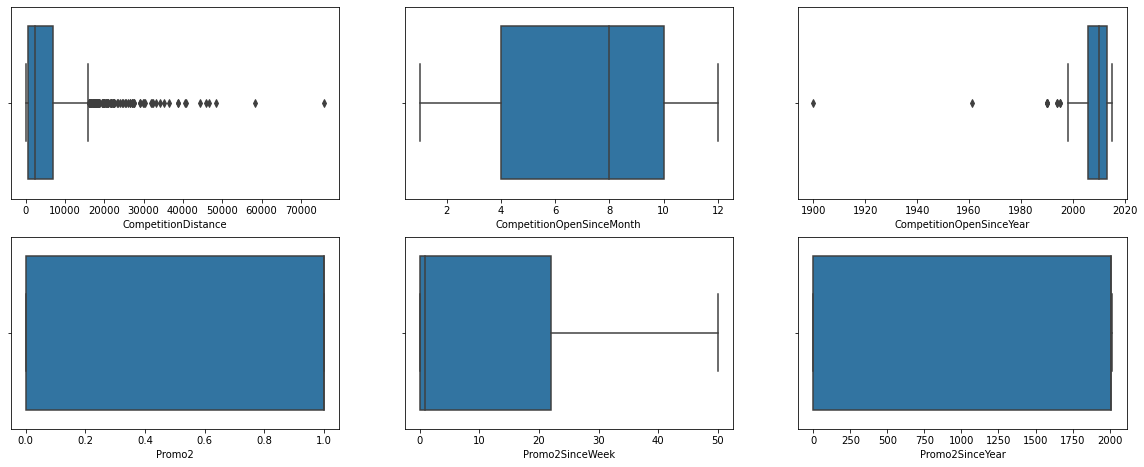

In [19]:
plt.figure(figsize = (20,12))
plt.subplot(3,3,1)
sns.boxplot(x='CompetitionDistance', data = store)
plt.subplot(3,3,2)
sns.boxplot(x='CompetitionOpenSinceMonth', data = store)
plt.subplot(3,3,3)
sns.boxplot(x='CompetitionOpenSinceYear', data = store)
plt.subplot(3,3,4)
sns.boxplot(x='Promo2', data = store)
plt.subplot(3,3,5)
sns.boxplot(x='Promo2SinceWeek', data = store)
plt.subplot(3,3,6)
sns.boxplot(x = 'Promo2SinceYear', data = store)
plt.show()

## From boxplots we can see there are outliers in CompetitionDistance and CompetitionOpenSinceYear attributes, so we need to analyse them

## For CompetitionDistance, we would not need the values higher than 99th percentile. We would cap the values having higher than 99th percentile to 99th percentile.

In [20]:
# Capping values of CompetitionDistane to 99th percentile

store.loc[store.CompetitionDistance>store.CompetitionDistance.quantile(.99),'CompetitionDistance']=store.CompetitionDistance.quantile(.99)

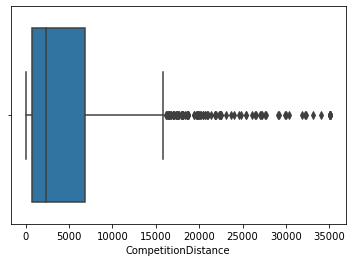

In [21]:
sns.boxplot(x='CompetitionDistance', data=store)
plt.show()

### The distance values seem to be in considerable range now.

## Checking for CompetitionOpenSinceYear

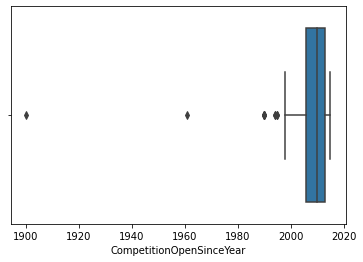

In [22]:
sns.boxplot(x='CompetitionOpenSinceYear', data = store)
plt.show()

In [23]:
store['CompetitionOpenSinceYear'].isnull().sum()

354

### We can see CompetitionOpenSinceYear has null values for 354 stores

In [24]:
# Checking the values of stores where CompetitionDistane is null

store.loc[store.CompetitionDistance.isnull(),['CompetitionDistance', 'CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Store']]

,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Store


### We can impute zero here

In [25]:
store.loc[store.CompetitionDistance.isnull(),'CompetitionOpenSinceMonth']=0
store.loc[store.CompetitionDistance.isnull(),'CompetitionOpenSinceYear']=0
store.loc[store.CompetitionDistance.isnull(),'CompetitionDistance']=0

In [26]:
# Again checking for null values

100*store.isnull().sum()/store.shape[0]

Store                         0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.000000
CompetitionOpenSinceMonth    31.748879
CompetitionOpenSinceYear     31.748879
Promo2                        0.000000
Promo2SinceWeek               0.000000
Promo2SinceYear               0.000000
PromoInterval                 0.000000
dtype: float64

### CompetitionOpenSineMonth and CompetitionOpenSinceYear are null for 31% of stores. lets check their cases

In [27]:
store.loc[store.CompetitionOpenSinceMonth.isnull(),['CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Store']]

,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Store
11,1070.0,NaN,NaN,12
12,310.0,NaN,NaN,13
15,3270.0,NaN,NaN,16
18,3240.0,NaN,NaN,19
21,1040.0,NaN,NaN,22
...,...,...,...,...
1095,1130.0,NaN,NaN,1096
1099,540.0,NaN,NaN,1100
1112,9260.0,NaN,NaN,1113
1113,870.0,NaN,NaN,1114


### No Data is available for competition store openings so lets impute them with zero

In [28]:
store.CompetitionOpenSinceYear.fillna(0, inplace=True)
store.CompetitionOpenSinceMonth.fillna(0, inplace=True)

In [29]:
# Checking null values

100*store.isnull().sum()/store.shape[0]

Store                        0.0
StoreType                    0.0
Assortment                   0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64

## Merging both the datasets

In [30]:
train = train.merge(right=store, on = 'Store', how = 'inner')

In [31]:
train.head()                   # Cheking first few entries of merged dataset

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [32]:
# Cheking shape of the new dataset

train.shape

(1017209, 18)

In [33]:
# Checking descriptionof the dataset

train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.311265e+03,4.926878e+00,1.370173e+03,5.005638e-01,1.164767e+01,1.007011e+03
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.051528e+03,4.283543e+00,9.353634e+02,4.999999e-01,1.532393e+01,1.005877e+03
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,4.000000e+00,2.006000e+03,1.000000e+00,1.000000e+00,2.009000e+03
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.880000e+03,9.000000e+00,2.011000e+03,1.000000e+00,2.200000e+01,2.012000e+03
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,3.510780e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03


In [34]:
# Checking percentage of null values in new dataset

100*train.isnull().sum()/train.shape[0]

Store                        0.0
DayOfWeek                    0.0
Date                         0.0
Sales                        0.0
Customers                    0.0
Open                         0.0
Promo                        0.0
StateHoliday                 0.0
SchoolHoliday                0.0
StoreType                    0.0
Assortment                   0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64

## We donot have null values in the merged data

# Bivariate Analysis on Data

## Box Plot Analysis

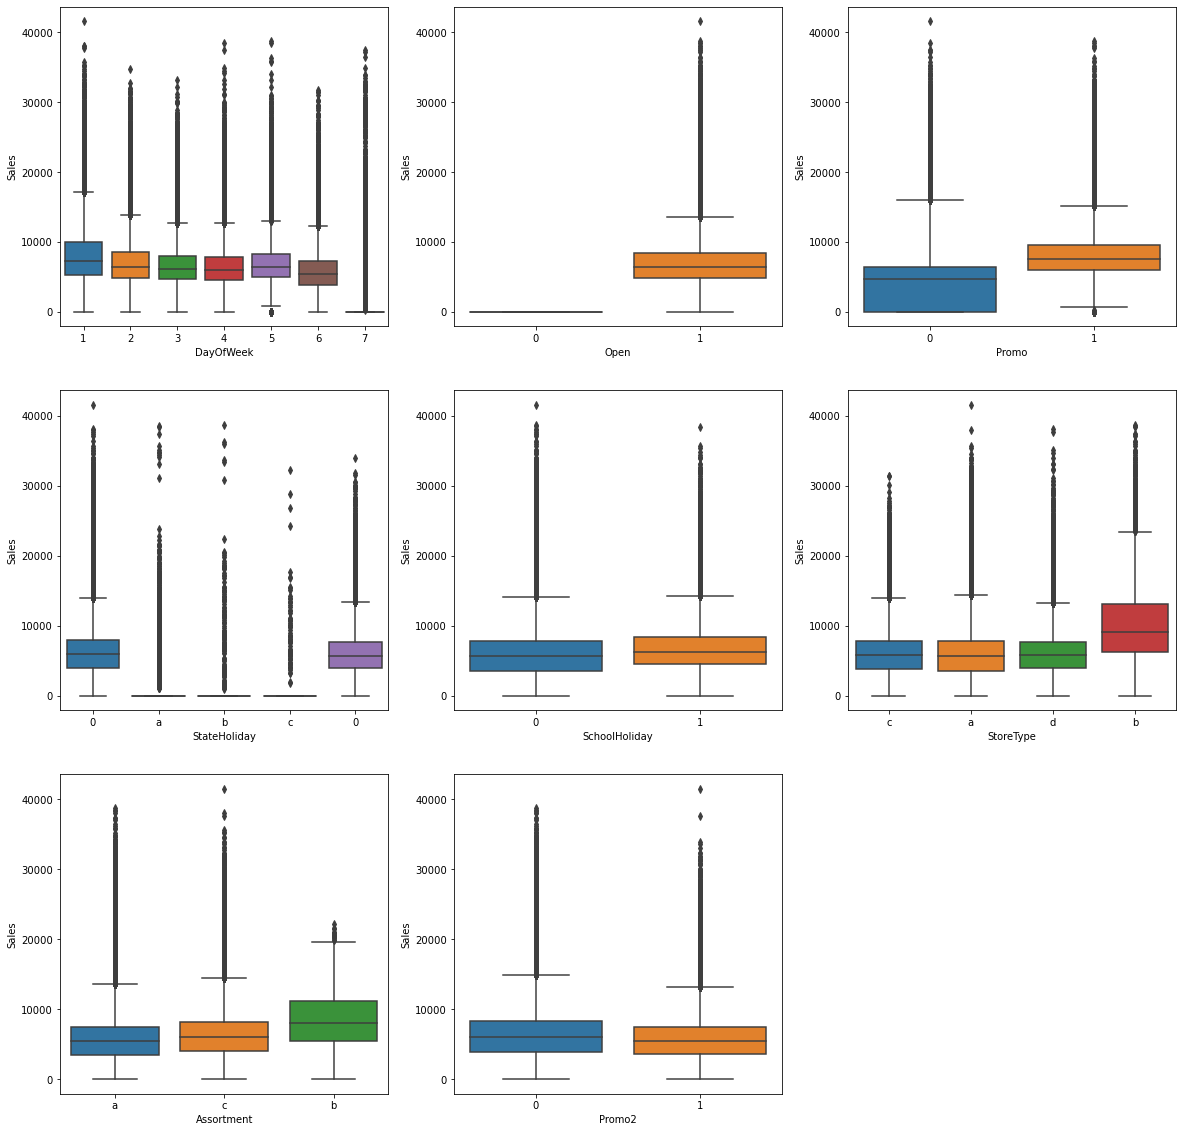

In [35]:
# Boxplots of attributes against Sales

plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x='DayOfWeek', y ='Sales', data= train)
plt.subplot(3,3,2)
sns.boxplot(x='Open', y ='Sales', data= train)
plt.subplot(3,3,3)
sns.boxplot(x='Promo', y ='Sales', data= train)
plt.subplot(3,3,4)
sns.boxplot(x='StateHoliday', y ='Sales', data= train)
plt.subplot(3,3,5)
sns.boxplot(x='SchoolHoliday', y ='Sales', data= train)
plt.subplot(3,3,6)
sns.boxplot(x='StoreType', y ='Sales', data= train)
plt.subplot(3,3,7)
sns.boxplot(x='Assortment', y ='Sales', data= train)
plt.subplot(3,3,8)
sns.boxplot(x='Promo2', y ='Sales', data= train)
plt.show()

## Infereneces from the merged data

Sales are higher on 1st, 2nd and 5th weekdays. Sales are lower on 7th weekday.

Sales are higher when promotion 1 is going on.

On state holidays a, b and c sales are low.

School holidays do not impact sales.

Type B store has higher% of sales than other store types.

Higher sales can be seenin Assortment of type B

Promo2 does not contribute much to Sales


## Scatter Plot Analysis

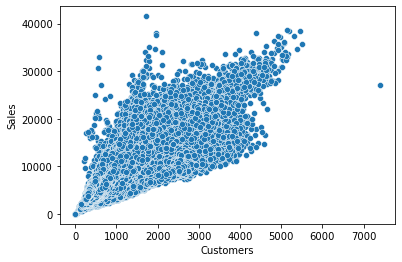

In [36]:
# Scatterplots of Customers against Sales

sns.scatterplot(x="Customers", y="Sales", data=train)
plt.show()

## Increase in no. of Cusomers correlates to an increase in Sales

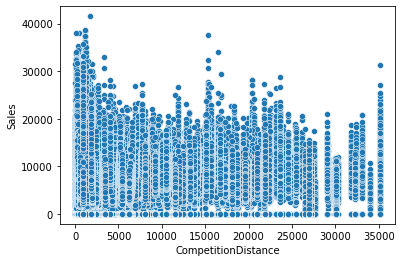

In [37]:
# Scatterplot of CompetitionDistance against Sales

sns.scatterplot(x="CompetitionDistance", y="Sales", data=train )
plt.show()

### CompetitionDistance does not seem to have any correlations against Sales

# Multivariate Analysis

## For Categorical variables

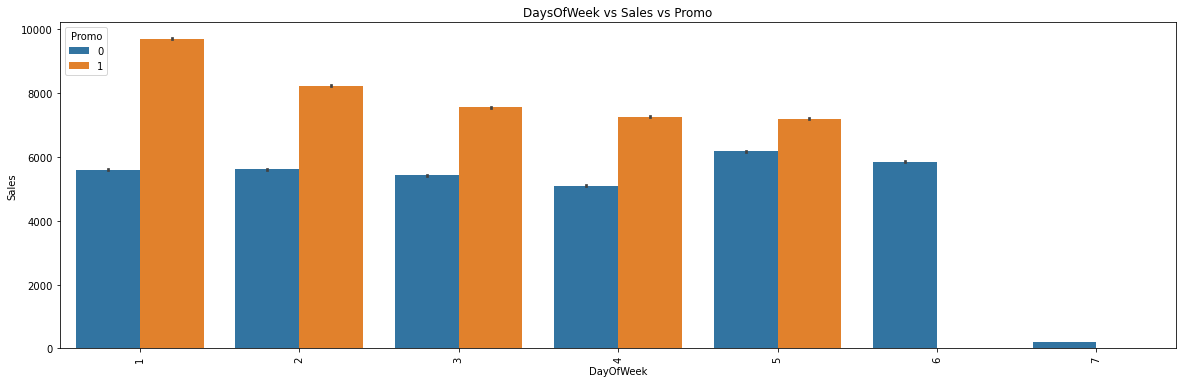

In [38]:
# Checking correlation between Sales vs Days vs Promo

plt.figure(figsize=(20,6))
sns.barplot(x='DayOfWeek', y='Sales', hue='Promo',data=train)
plt.title('DaysOfWeek vs Sales vs Promo')
plt.xticks(rotation = 90)
plt.show()

### Promotion has a strong co-relation with Sales of the Stores.

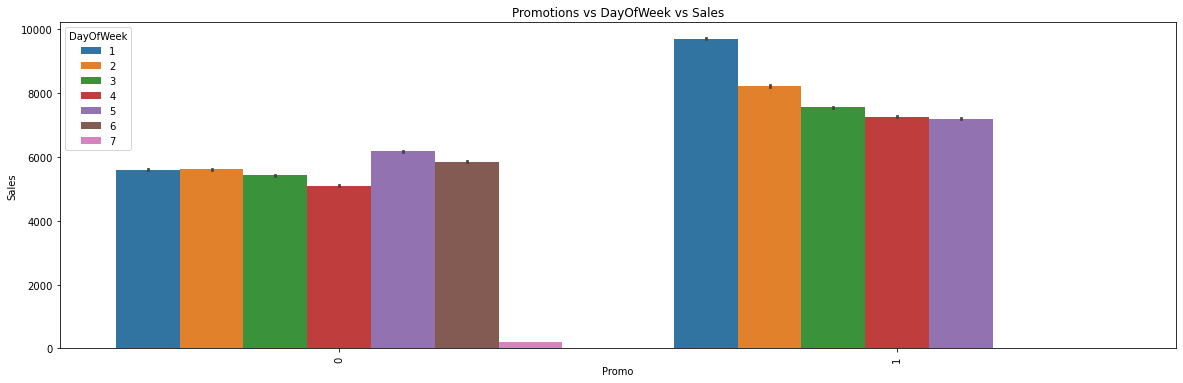

In [39]:
# Checking co-relation between Promo and Day

plt.figure(figsize=(20,6))
sns.barplot(x='Promo', y='Sales', hue='DayOfWeek', data=train)
plt.title('Promotions vs DayOfWeek vs Sales')
plt.xticks(rotation= 90)
plt.show()

### Days at the start of the week have higher Sales than on other days

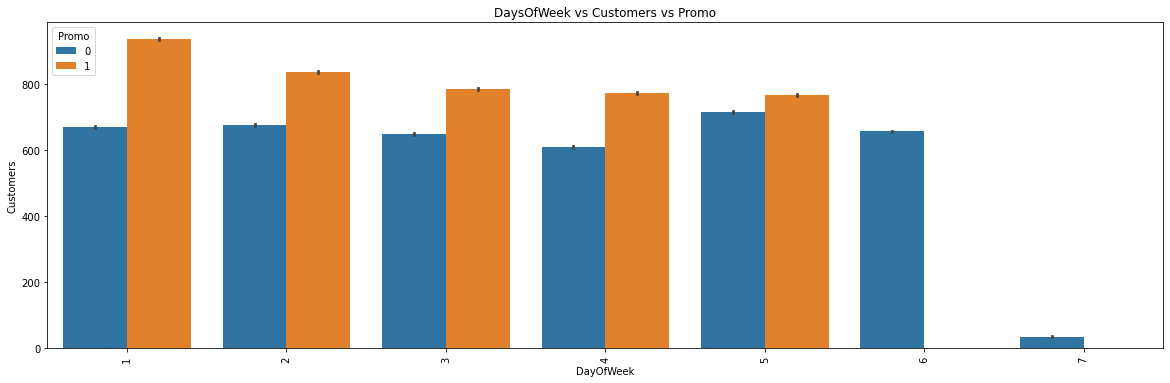

In [40]:
# Checking co-relation between Days vs Customers vs Promo

plt.figure(figsize=(20,6))
sns.barplot(x='DayOfWeek', y='Customers', hue='Promo', data=train)
plt.title('DaysOfWeek vs Customers vs Promo')
plt.xticks(rotation= 90)
plt.show()

### Customers are higher on weekdays and when promotions are active

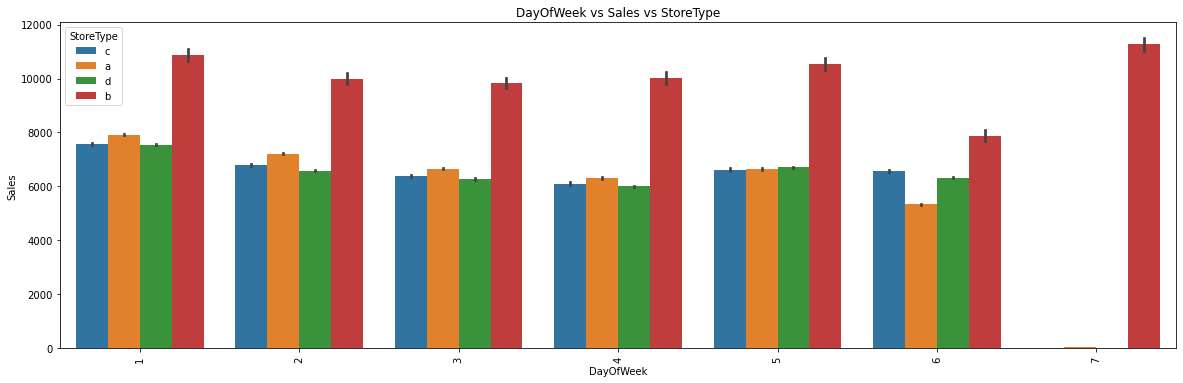

In [41]:
# Checking co-relation between Days vs Sales vs StoreType 

plt.figure(figsize=(20, 6))
sns.barplot(x='DayOfWeek',y='Sales',hue='StoreType',data=train)
plt.title("DayOfWeek vs Sales vs StoreType")
plt.xticks(rotation = 90)
plt.show()

### Sales for Storetype b is highest among all days including day 7 where sales for other store type is almost zero. On day 6, the difference in Sales among store type is marginally lower than other days

# For Numerical Variables

<Figure size 2880x2880 with 0 Axes>

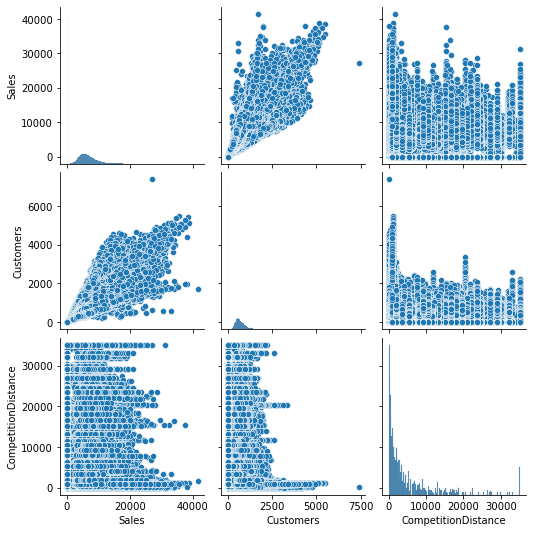

In [42]:
# Pairwise Plot

plt.figure(figsize=(40, 40))
sns.pairplot(train[['Sales','Customers','CompetitionDistance']])
plt.show()

### From the plot we can infer that as customers increase, Sales also increases.

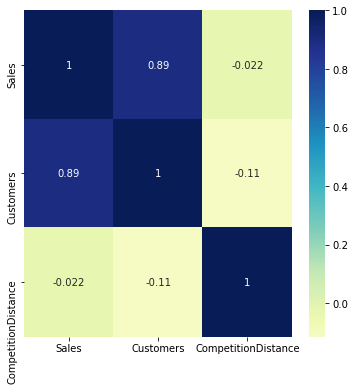

In [43]:
# Checking correlation coefficients for numerical variables
# We plot heat map to determine correlation

cor=train[['Sales','Customers','CompetitionDistance']].corr()
plt.figure(figsize = (6,6))
sns.heatmap(cor,annot=True, center=0.4, cmap='YlGnBu')
plt.show()

### Sales and Customers have strong correlation. For other variables, it is insignifiant.

# Feature Engineering

## Creating Dummy Variables

In [44]:
# Creating dummy variables for day of the week

dummies=pd.get_dummies(train['DayOfWeek'], drop_first=True, prefix='DayOfWeek')
train=pd.concat([train,dummies],axis = 1)

In [45]:
# Creating dummy variable for Store Type

dummies=pd.get_dummies(train['StoreType'], drop_first=True, prefix='StoreType')
train=pd.concat([train,dummies],axis = 1)

In [46]:
# Creating dummy variable for Assortment

dummies=pd.get_dummies(train['Assortment'], drop_first=True, prefix='Assortment')
train=pd.concat([train,dummies],axis = 1)

In [47]:
# Checking the data again

train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,0,0,1,0,0,0,1,0,0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,...,0,1,0,0,0,0,1,0,0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,...,1,0,0,0,0,0,1,0,0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,...,0,0,0,0,0,0,1,0,0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,...,0,0,0,0,0,0,1,0,0,0


In [48]:
# Dropping DayOfWeek, StoreType and Assortment

train.drop(['DayOfWeek','StoreType','Assortment'], axis=1, inplace=True)
train.head()

,Store,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,...,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
0,1,2015-07-31,5263,555,1,1,0,1,1270.0,9.0,...,0,0,1,0,0,0,1,0,0,0
1,1,2015-07-30,5020,546,1,1,0,1,1270.0,9.0,...,0,1,0,0,0,0,1,0,0,0
2,1,2015-07-29,4782,523,1,1,0,1,1270.0,9.0,...,1,0,0,0,0,0,1,0,0,0
3,1,2015-07-28,5011,560,1,1,0,1,1270.0,9.0,...,0,0,0,0,0,0,1,0,0,0
4,1,2015-07-27,6102,612,1,1,0,1,1270.0,9.0,...,0,0,0,0,0,0,1,0,0,0


In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 26 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   Date                       1017209 non-null  object 
 2   Sales                      1017209 non-null  int64  
 3   Customers                  1017209 non-null  int64  
 4   Open                       1017209 non-null  int64  
 5   Promo                      1017209 non-null  int64  
 6   StateHoliday               1017209 non-null  object 
 7   SchoolHoliday              1017209 non-null  int64  
 8   CompetitionDistance        1017209 non-null  float64
 9   CompetitionOpenSinceMonth  1017209 non-null  float64
 10  CompetitionOpenSinceYear   1017209 non-null  float64
 11  Promo2                     1017209 non-null  int64  
 12  Promo2SinceWeek            1017209 non-null  float64
 13  Promo2SinceY

### For Competition data we will merge the data into a single column

In [50]:
train['CompetitionOpenSince'] = train.CompetitionOpenSinceYear.astype(int).astype(str) + '-' + train.CompetitionOpenSinceMonth.astype(int).astype(str) + '-01'
train.head()

,Store,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,...,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,CompetitionOpenSince
0,1,2015-07-31,5263,555,1,1,0,1,1270.0,9.0,...,0,1,0,0,0,1,0,0,0,2008-9-01
1,1,2015-07-30,5020,546,1,1,0,1,1270.0,9.0,...,1,0,0,0,0,1,0,0,0,2008-9-01
2,1,2015-07-29,4782,523,1,1,0,1,1270.0,9.0,...,0,0,0,0,0,1,0,0,0,2008-9-01
3,1,2015-07-28,5011,560,1,1,0,1,1270.0,9.0,...,0,0,0,0,0,1,0,0,0,2008-9-01
4,1,2015-07-27,6102,612,1,1,0,1,1270.0,9.0,...,0,0,0,0,0,1,0,0,0,2008-9-01


In [51]:
# Dropping CompetitionOpenSinceMonth, CompetitionOpenSinceYear Feilds

train.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear'], axis=1, inplace=True)

### We had 354 stores where competition opening dates were not available, the dates for CompetitionOpenSince for those stores needs to be imputed with null

In [52]:
train.loc[train.CompetitionOpenSince=='0-0-01','CompetitionOpenSince']

10362      0-0-01
10363      0-0-01
10364      0-0-01
10365      0-0-01
10366      0-0-01
            ...  
1017204    0-0-01
1017205    0-0-01
1017206    0-0-01
1017207    0-0-01
1017208    0-0-01
Name: CompetitionOpenSince, Length: 323348, dtype: object

In [53]:
# Imputing them with null

train.loc[train.CompetitionOpenSince=='0-0-01', 'CompetitionOpenSince']=np.nan

In [54]:
#Checking Datatypes

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 25 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Store                 1017209 non-null  int64  
 1   Date                  1017209 non-null  object 
 2   Sales                 1017209 non-null  int64  
 3   Customers             1017209 non-null  int64  
 4   Open                  1017209 non-null  int64  
 5   Promo                 1017209 non-null  int64  
 6   StateHoliday          1017209 non-null  object 
 7   SchoolHoliday         1017209 non-null  int64  
 8   CompetitionDistance   1017209 non-null  float64
 9   Promo2                1017209 non-null  int64  
 10  Promo2SinceWeek       1017209 non-null  float64
 11  Promo2SinceYear       1017209 non-null  float64
 12  PromoInterval         1017209 non-null  object 
 13  DayOfWeek_2           1017209 non-null  uint8  
 14  DayOfWeek_3           1017209 non-

### Date and CompetitionOpenSince are date objects, we need to convert them into datetime objects

In [55]:
# Converting date and CompetitionOpenSince feild to datetime object

train['Date']=pd.to_datetime(train['Date'], errors='coerce')
train['CompetitionOpenSince']=pd.to_datetime(train['CompetitionOpenSince'], errors='coerce')

In [56]:
# Checking again datatypes

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 25 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   Store                 1017209 non-null  int64         
 1   Date                  1017209 non-null  datetime64[ns]
 2   Sales                 1017209 non-null  int64         
 3   Customers             1017209 non-null  int64         
 4   Open                  1017209 non-null  int64         
 5   Promo                 1017209 non-null  int64         
 6   StateHoliday          1017209 non-null  object        
 7   SchoolHoliday         1017209 non-null  int64         
 8   CompetitionDistance   1017209 non-null  float64       
 9   Promo2                1017209 non-null  int64         
 10  Promo2SinceWeek       1017209 non-null  float64       
 11  Promo2SinceYear       1017209 non-null  float64       
 12  PromoInterval         1017209 non-null  ob

### There will be store transaction dates where sales were made before competition started and sales after competition. we will create a flag for their identfication

In [57]:
def calculate_competition(row):
    if row.CompetitionOpenSince>row.Date:
        return 1
    else:
        return 0
train['Before_Competition']=train[['CompetitionOpenSince','Date']].apply(calculate_competition, axis=1)

In [58]:
train.head()

,Store,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,...,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,CompetitionOpenSince,Before_Competition
0,1,2015-07-31,5263,555,1,1,0,1,1270.0,0,...,1,0,0,0,1,0,0,0,2008-09-01,0
1,1,2015-07-30,5020,546,1,1,0,1,1270.0,0,...,0,0,0,0,1,0,0,0,2008-09-01,0
2,1,2015-07-29,4782,523,1,1,0,1,1270.0,0,...,0,0,0,0,1,0,0,0,2008-09-01,0
3,1,2015-07-28,5011,560,1,1,0,1,1270.0,0,...,0,0,0,0,1,0,0,0,2008-09-01,0
4,1,2015-07-27,6102,612,1,1,0,1,1270.0,0,...,0,0,0,0,1,0,0,0,2008-09-01,0


In [59]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 26 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   Store                 1017209 non-null  int64         
 1   Date                  1017209 non-null  datetime64[ns]
 2   Sales                 1017209 non-null  int64         
 3   Customers             1017209 non-null  int64         
 4   Open                  1017209 non-null  int64         
 5   Promo                 1017209 non-null  int64         
 6   StateHoliday          1017209 non-null  object        
 7   SchoolHoliday         1017209 non-null  int64         
 8   CompetitionDistance   1017209 non-null  float64       
 9   Promo2                1017209 non-null  int64         
 10  Promo2SinceWeek       1017209 non-null  float64       
 11  Promo2SinceYear       1017209 non-null  float64       
 12  PromoInterval         1017209 non-null  ob

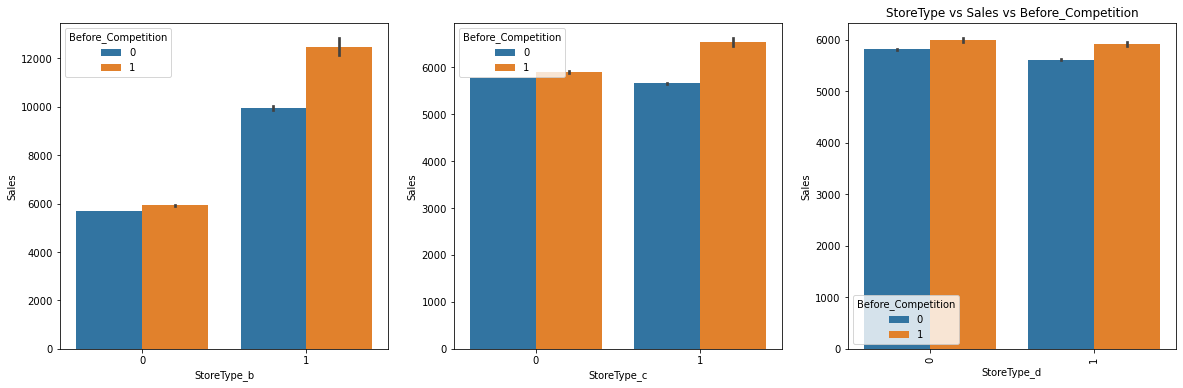

In [60]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.barplot(x='StoreType_b',y='Sales',hue='Before_Competition', data= train)
plt.subplot(1,3,2)
sns.barplot(x='StoreType_c',y='Sales',hue='Before_Competition', data= train)
plt.subplot(1,3,3)
sns.barplot(x='StoreType_d',y='Sales',hue='Before_Competition', data= train)

plt.title("StoreType vs Sales vs Before_Competition")
plt.xticks(rotation=90)
plt.show()

### Sales data before and after competition does not change much so we can drop this feild

In [61]:
train.drop(['Before_Competition'], inplace=True, axis=1)

### We can also drop CompetitionOpenSince, since this is feild derived from Before_Competition

In [62]:
train.drop(['CompetitionOpenSince'], inplace=True, axis=1)

In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 24 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   Store                1017209 non-null  int64         
 1   Date                 1017209 non-null  datetime64[ns]
 2   Sales                1017209 non-null  int64         
 3   Customers            1017209 non-null  int64         
 4   Open                 1017209 non-null  int64         
 5   Promo                1017209 non-null  int64         
 6   StateHoliday         1017209 non-null  object        
 7   SchoolHoliday        1017209 non-null  int64         
 8   CompetitionDistance  1017209 non-null  float64       
 9   Promo2               1017209 non-null  int64         
 10  Promo2SinceWeek      1017209 non-null  float64       
 11  Promo2SinceYear      1017209 non-null  float64       
 12  PromoInterval        1017209 non-null  object        
 1

### We have seen earlier that Promo2 variable does not much impact on Sales, so we will drop them 

In [64]:
train.drop(['Promo2','Promo2SinceWeek','Promo2SinceYear'], inplace=True, axis=1)
train.head()

,Store,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,PromoInterval,...,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
0,1,2015-07-31,5263,555,1,1,0,1,1270.0,0,...,0,0,1,0,0,0,1,0,0,0
1,1,2015-07-30,5020,546,1,1,0,1,1270.0,0,...,0,1,0,0,0,0,1,0,0,0
2,1,2015-07-29,4782,523,1,1,0,1,1270.0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,2015-07-28,5011,560,1,1,0,1,1270.0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,2015-07-27,6102,612,1,1,0,1,1270.0,0,...,0,0,0,0,0,0,1,0,0,0


# Time Series Analysis

## From our earlier analysis, we have seen that increase in Customers directly translated to increase in Sales. Which means customer counts are a endogenous variable for our predictions

In [65]:
# Setting date as index
df_train=train.set_index('Date')
df_train.head()

,Store,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,PromoInterval,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
Date,,,,,,,,,,,,,,,,,,,,
2015-07-31,1,5263,555,1,1,0,1,1270.0,0,0,0,0,1,0,0,0,1,0,0,0
2015-07-30,1,5020,546,1,1,0,1,1270.0,0,0,0,1,0,0,0,0,1,0,0,0
2015-07-29,1,4782,523,1,1,0,1,1270.0,0,0,1,0,0,0,0,0,1,0,0,0
2015-07-28,1,5011,560,1,1,0,1,1270.0,0,1,0,0,0,0,0,0,1,0,0,0
2015-07-27,1,6102,612,1,1,0,1,1270.0,0,0,0,0,0,0,0,0,1,0,0,0


In [66]:
# We group the data at a date level for analysis

df_train_all=df_train.groupby('Date').agg({'Sales':'mean',
                                           'Customers':'mean',
                                           'Promo':'sum',
                                           'SchoolHoliday':'sum',
                                           'DayOfWeek_2':'mean',
                                           'DayOfWeek_3':'mean',
                                           'DayOfWeek_4':'mean',
                                           'DayOfWeek_5':'mean',
                                           'DayOfWeek_6':'mean',
                                           'DayOfWeek_7':'mean'})
df_train_all.head()

,Sales,Customers,Promo,SchoolHoliday,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7
Date,,,,,,,,,,
2013-01-01,87.284560,17.496409,0,1114,1,0,0,0,0,0
2013-01-02,6233.030493,748.049327,0,1115,0,1,0,0,0,0
2013-01-03,5693.112108,682.547085,0,1040,0,0,1,0,0,0
2013-01-04,5954.218834,701.468161,0,1040,0,0,0,1,0,0
2013-01-05,5337.751570,616.566816,0,112,0,0,0,0,1,0


## Creating a function for time series plots

In [67]:
def timeseries_plot(series, c):
    fig = plt.figure(figsize=(20,3))
    series.plot()
    plt.xlabel('Date')
    plt.ylabel(c)
    plt.title('For {}'.format(c))
    plt.show()

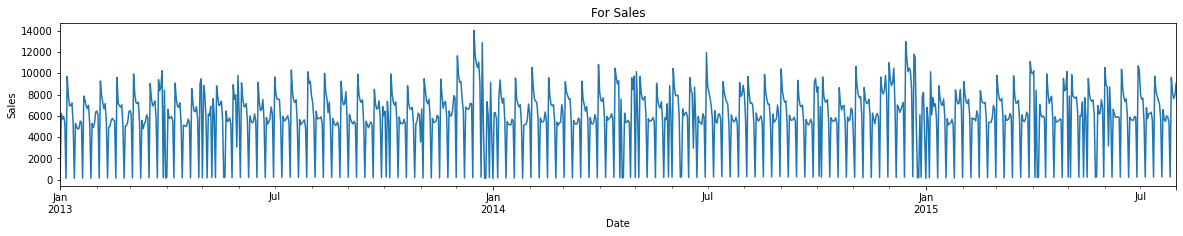

In [68]:
# Plot time series chart for Sales

timeseries_plot(df_train_all['Sales'],'Sales')

### We Create a a function for seasonal decomposition

In [69]:
from statsmodels.tsa.seasonal import seasonal_decompose as sm

In [70]:
def plot_seasonal_decomposition(series,c,model):
    decomposition = sm(series, model = model) # additive seasonal index
    plt.rcParams['figure.figsize']=18, 14
    fig=decomposition.plot()
    plt.show()
    print('Mean Residual for {} = {}'.format(c,decomposition.resid.mean()))

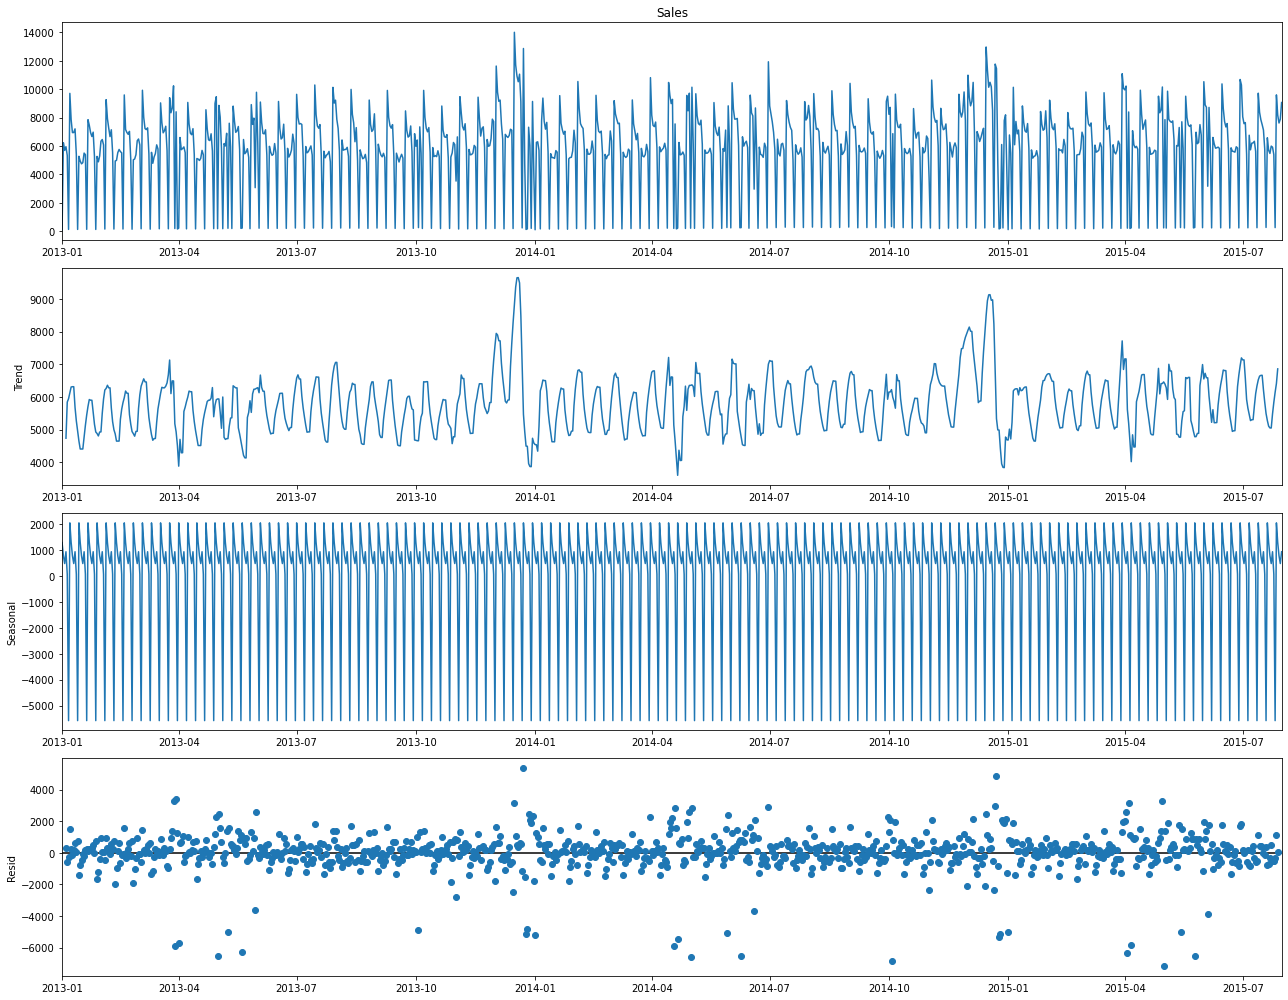

Mean Residual for Sales = 0.6202792140320815


In [71]:
plot_seasonal_decomposition(df_train_all['Sales'],'Sales','additive')

# Casualty Testing

### We have seen that Sales and Customers have high correlation so lets check casuality 

In [72]:
from statsmodels.tsa.stattools import grangercausalitytests

causality_sales=grangercausalitytests(df_train_all[['Sales','Customers']].dropna(), 4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=207.3179, p=0.0000  , df_denom=938, df_num=1
ssr based chi2 test:   chi2=207.9810, p=0.0000  , df=1
likelihood ratio test: chi2=187.9060, p=0.0000  , df=1
parameter F test:         F=207.3179, p=0.0000  , df_denom=938, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=117.7859, p=0.0000  , df_denom=935, df_num=2
ssr based chi2 test:   chi2=236.8316, p=0.0000  , df=2
likelihood ratio test: chi2=211.2191, p=0.0000  , df=2
parameter F test:         F=117.7859, p=0.0000  , df_denom=935, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=84.6075 , p=0.0000  , df_denom=932, df_num=3
ssr based chi2 test:   chi2=255.7290, p=0.0000  , df=3
likelihood ratio test: chi2=226.1668, p=0.0000  , df=3
parameter F test:         F=84.6075 , p=0.0000  , df_denom=932, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=70.9777 , p=0.0000  

### test shows casuality between Sales and Customers

# Stationary Test

### Creating a function for testing stationarity using ADF statistic

In [73]:
from statsmodels.tsa.stattools import adfuller

def stationary_test(df):
    for c in df.columns:
        print('For ', c)
        print('*'*100)
        r=adfuller(df[c],autolag='AIC')
        print('ADF Statistic=',r[0])
        print('P value=',r[1])
        output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
        p_value = output['pvalue']
        if p_value <= 0.05:
            print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
            print(f" => Series is Stationary.")
        else:
            print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
            print(f" => Series is Non-Stationary.")

In [74]:
stationary_test(df_train_all[['Sales','Customers']])

For  Sales
****************************************************************************************************
ADF Statistic= -5.650822837207897
P value= 9.870006549261963e-07
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.
For  Customers
****************************************************************************************************
ADF Statistic= -5.933710149589008
P value= 2.3477735379189515e-07
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


### The p-values for both the variables is less than 0.05. We can reject the null hypothesis. The series is stationary.

### In the dataset, we do not have any other variable which is linearly related to Sales. They do not seem to be time series inputs for our analysis.

## We had earlier determined that since increase in customers relate to increased sales and since no other variable is a time series, we will consider them to be exogenous.

# Autocorelation

## Plotting ACF and PACF plots

In [75]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

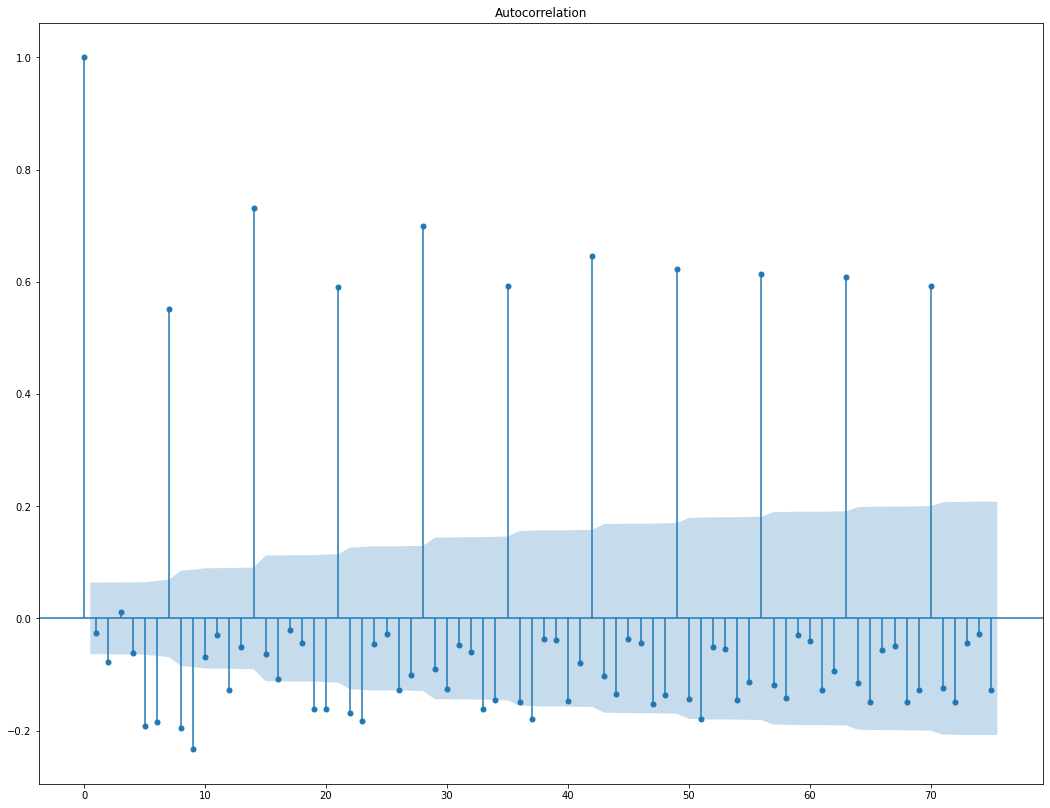

In [76]:
plot_acf(df_train_all['Sales'], lags=75);

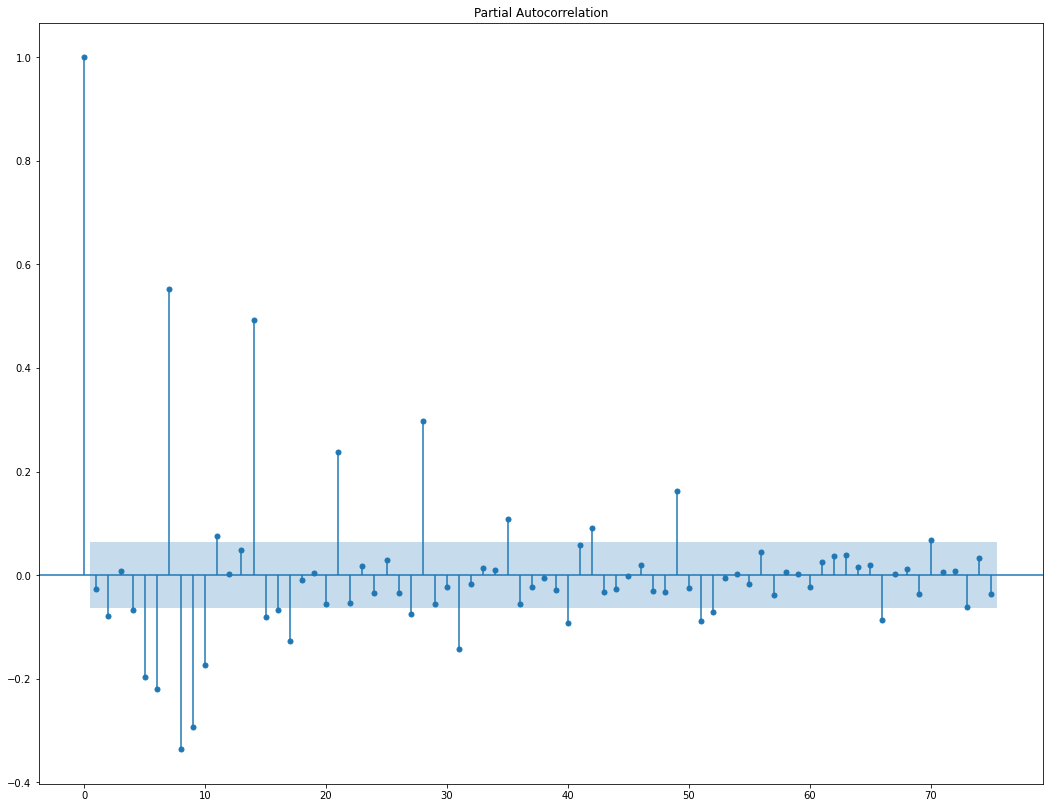

In [77]:
plot_pacf(df_train_all['Sales'], lags=75);

### For ACF, we set q=0 as co-realation never comes dowm. For PACF, we set q=7, since it is the highest lag since inception.

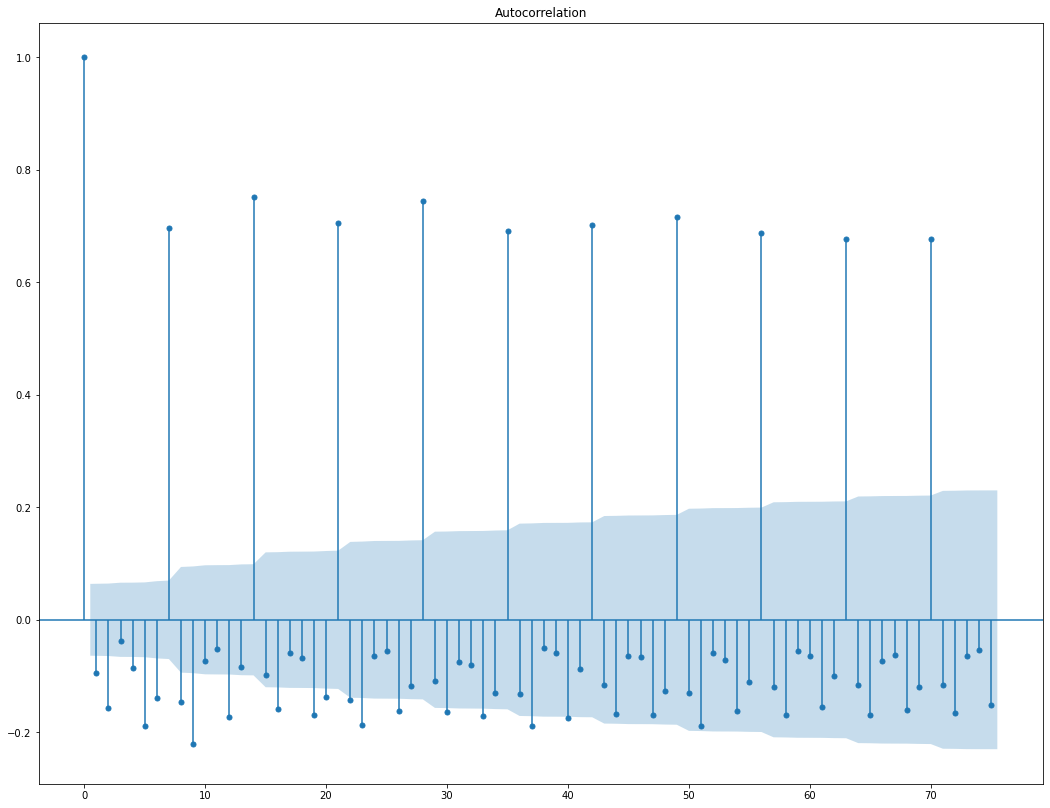

In [78]:
plot_acf(df_train_all['Customers'], lags=75);

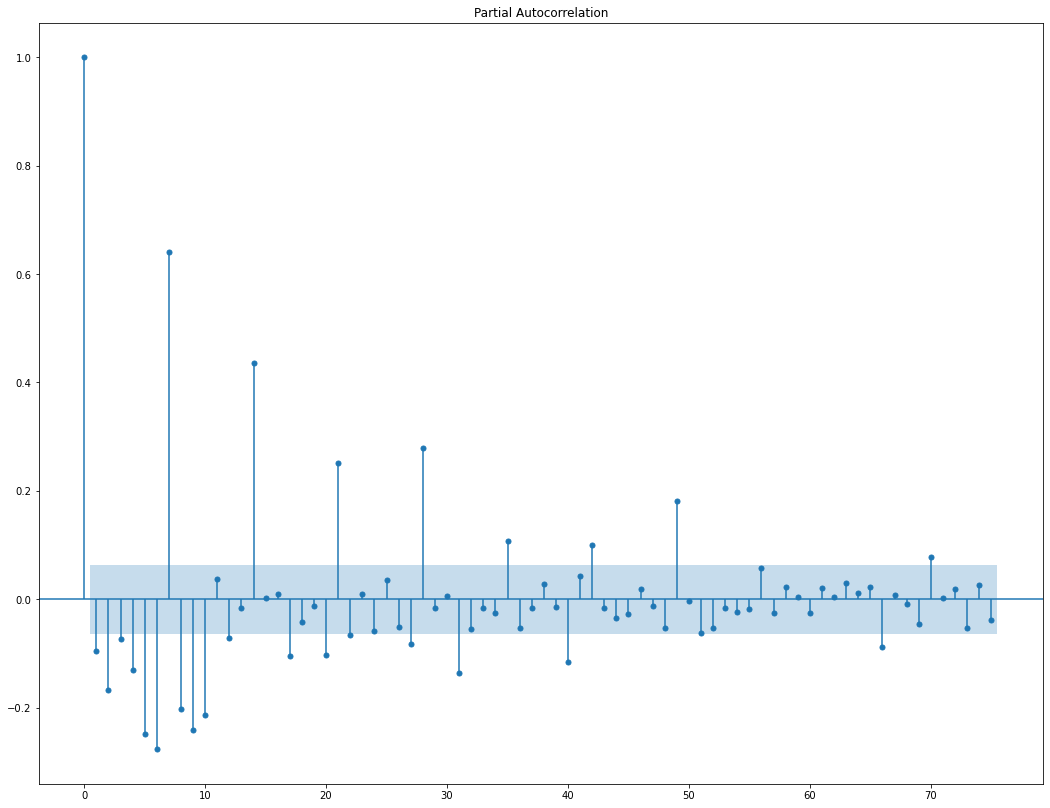

In [79]:
plot_pacf(df_train_all['Customers'], lags=75);

### For ACF, we set q=0 as co-realation never comes dowm. For PACF, we set p=7, since it is the highest lag since inception.

# Train - Test Split

## We need to predict the sales for next 6 weeks(42 days). So we keep 42 days for test and rest as training

In [80]:
df_train_all.shape

(942, 10)

## We will use first 900 rows as train and last 42 as test

In [81]:
# Splitting the Data

train_len=900
df_train_all_train=df_train_all[:train_len]
df_train_all_test=df_train_all[train_len:]

In [82]:
df_train_all_train.shape

(900, 10)

In [83]:
df_train_all_test.shape

(42, 10)

## Standardising numerical values in test_train datasets using minmax Scaler

In [84]:
from sklearn.preprocessing import MinMaxScaler

#Fit transform on train data
minmax=MinMaxScaler()
df_train_all_train[['Sales','Customers','Promo','SchoolHoliday']]=minmax.fit_transform(df_train_all_train[['Sales','Customers','Promo','SchoolHoliday']])

In [85]:
df_train_all_train.head()

,Sales,Customers,Promo,SchoolHoliday,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7
Date,,,,,,,,,,
2013-01-01,0.000000,0.000000,0.0,0.999103,1,0,0,0,0,0
2013-01-02,0.441350,0.543373,0.0,1.000000,0,1,0,0,0,0
2013-01-03,0.402577,0.494654,0.0,0.932735,0,0,1,0,0,0
2013-01-04,0.421328,0.508727,0.0,0.932735,0,0,0,1,0,0
2013-01-05,0.377057,0.445579,0.0,0.100448,0,0,0,0,1,0


In [86]:
# Transform on Test Data

df_train_all_test[['Sales','Customers','Promo','SchoolHoliday']]=minmax.transform(df_train_all_test[['Sales','Customers','Promo','SchoolHoliday']])

In [87]:
df_train_all_test.head()

,Sales,Customers,Promo,SchoolHoliday,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7
Date,,,,,,,,,,
2015-06-20,0.405336,0.453472,0.0,0.0,0,0,0,0,1,0
2015-06-21,0.009824,0.015096,0.0,0.0,0,0,0,0,0,1
2015-06-22,0.415762,0.489576,0.0,0.0,0,0,0,0,0,0
2015-06-23,0.399006,0.475851,0.0,0.0,1,0,0,0,0,0
2015-06-24,0.396755,0.474848,0.0,0.0,0,1,0,0,0,0


# VAR [Vector AutoRegrgressive Model]

In [88]:
from statsmodels.tsa.api import VAR

exog = df_train_all_train[['Promo','SchoolHoliday','DayOfWeek_2','DayOfWeek_3','DayOfWeek_4','DayOfWeek_5','DayOfWeek_6','DayOfWeek_7']].astype(float)
endog = df_train_all_train[['Sales', 'Customers']].astype(float)
var_model = VAR(endog,exog)
res=var_model.select_order(maxlags=20)
print(res.summary())

C:\Users\Siddhesh E. Paradkar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -12.14      -12.04   5.338e-06      -12.10
1       -12.26      -12.14   4.749e-06      -12.21
2       -12.25      -12.11   4.763e-06      -12.20
3       -12.29      -12.13   4.582e-06      -12.23
4       -12.30      -12.11   4.564e-06      -12.23
5       -12.30      -12.09   4.559e-06      -12.22
6       -12.31      -12.08   4.518e-06      -12.22
7       -12.31      -12.06   4.498e-06      -12.22
8       -12.46      -12.19   3.863e-06      -12.36
9       -12.49     -12.20*   3.748e-06      -12.38
10      -12.51      -12.20   3.689e-06      -12.39
11      -12.53      -12.19   3.621e-06      -12.40
12      -12.52      -12.16   3.645e-06      -12.39
13      -12.53      -12.15   3.615e-06      -12.39
14      -12.57      -12.17   3.460e-06     -12.42*
15     -12.58*      -12.16  3.433e-06*      -12.42
16      -12.58      -12.13   3.

### AIC is the lowest at lag 12.

In [89]:
# Fitting the model with lag 12

var_model_final = var_model.fit(12)
var_model_final.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 08, Jun, 2022
Time:                     22:33:06
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -12.1801
Nobs:                     888.000    HQIC:                  -12.4000
Log likelihood:           3111.95    FPE:                3.59509e-06
AIC:                     -12.5360    Det(Omega_mle):     3.34208e-06
--------------------------------------------------------------------
Results for equation Sales
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                 0.330165         0.059547            5.545           0.000
Promo                 0.169213         0.016355           10.346           0.000
SchoolHoliday        -0.033520         0.012734           -2

### Perform Johassen test with p=10

# Cointegration test

### Creating function for johassen test for checking cointegration

In [90]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.vector_ar.vecm import select_coint_rank

def cointegration_test(df, lag): 
    alpha=0.05
    out = coint_johansen(df,-1,lag)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

In [91]:
df_train_all['Sales']=df_train_all['Sales'].apply(lambda x:round(x))
df_train_all['Customers']=df_train_all['Customers'].apply(lambda x:round(x))

In [92]:
cointegration_test(df_train_all[['Sales','Customers']],10)
rank_result=select_coint_rank(df_train_all[['Sales','Customers']],-1,10)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Sales  ::  127.93    > 12.3212   =>   True
Customers ::  6.57      > 4.1296    =>   True


### We have the rank of Johassen test as 2 which means that the time series are stationary but do not seem to be co-integratied

In [93]:
# Getting lag order

lag_order = var_model_final.k_ar
print(lag_order) 
forecast_input = df_train_all_train[['Sales','Customers']].values[-lag_order:]
forecast_input

12


array([[0.46820514, 0.54114876],
       [0.43595062, 0.50832754],
       [0.41397174, 0.4892133 ],
       [0.41579704, 0.49799996],
       [0.41923316, 0.49742961],
       [0.41303913, 0.45743139],
       [0.0110916 , 0.01718541],
       [0.73892895, 0.69369782],
       [0.61440719, 0.61305964],
       [0.54882338, 0.56709914],
       [0.5213138 , 0.5473912 ],
       [0.53850368, 0.5678536 ]])

## Forecasting using VAR

In [94]:
exog_test = df_train_all_test[['Promo','SchoolHoliday','DayOfWeek_2','DayOfWeek_3','DayOfWeek_4','DayOfWeek_5','DayOfWeek_6','DayOfWeek_7']].astype(float)
fc = var_model_final.forecast(y=forecast_input, steps=42,exog_future=exog_test)
var_forecast = pd.DataFrame(fc, index=df_train_all_test.index, columns=['Sales','Customers'])
var_forecast

,Sales,Customers
Date,,
2015-06-20,0.441270,0.499874
2015-06-21,0.016641,0.013691
2015-06-22,0.428811,0.509404
2015-06-23,0.415981,0.507198
2015-06-24,0.377637,0.461870
2015-06-25,0.343585,0.426630
2015-06-26,0.430957,0.513025
2015-06-27,0.420909,0.475067
2015-06-28,0.022936,0.019426


In [95]:
# Adding forecasted values

df_train_all_test['VarForecastedSales']=var_forecast.Sales
df_train_all_test['VarForecastedCustomers']=var_forecast.Customers

### Creating a function for results visualization

In [96]:
def forecasted_timeseries_visualization(series,forecasted_series,c,model):
    fig = plt.figure(figsize=(20, 3))
    series.plot(label='Actual')
    forecasted_series.plot(label='Forecasted')
    plt.xlabel('Date')
    plt.ylabel(c)
    plt.legend(loc='best')
    plt.title('{} model For {}'.format(model,c))
    plt.show()

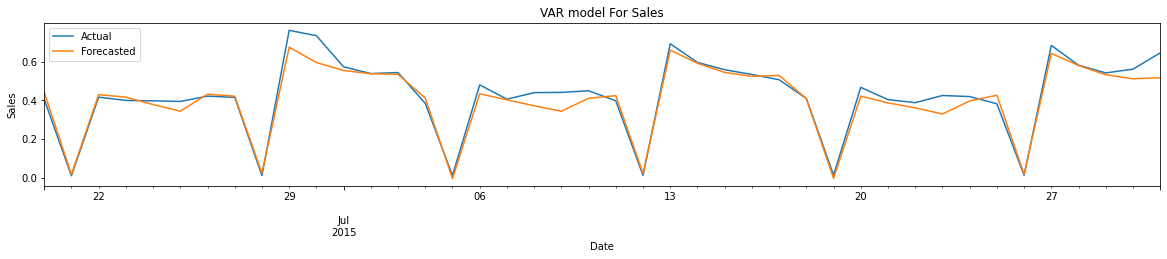

In [97]:
forecasted_timeseries_visualization(df_train_all_test['Sales'],df_train_all_test['VarForecastedSales'],'Sales','VAR')

### Storing results in a dataframe

In [98]:
from sklearn.metrics import mean_squared_error
summary_df=pd.DataFrame(columns=['Store','Model','RMSE_SALES','MAPE_SALES','RMSE_CUSTOMERS','MAPE_CUSTOMERS'])

def summary(s,fs,c,fc,store,model):
    rmse_sales = np.sqrt(mean_squared_error(s, fs)).round(2)
    mape_sales = np.round(np.mean(np.abs(s-fs)/s)*100,2)
    rmse_customers = np.sqrt(mean_squared_error(c, fc)).round(2)
    mape_customers = np.round(np.mean(np.abs(c-fc)/c)*100,2)
    temp=pd.DataFrame({'Store':[store],'Model':[model], 'RMSE_SALES': [rmse_sales],'MAPE_SALES': [mape_sales] , 
                            'RMSE_CUSTOMERS': [rmse_customers],'MAPE_CUSTOMERS': [mape_customers]})
    return temp

In [99]:
d=summary(df_train_all_test['Sales'], df_train_all_test['VarForecastedSales'],
       df_train_all_test['Customers'], df_train_all_test['VarForecastedCustomers'],'All','VAR')
summary_df = pd.concat([summary_df, d])
summary_df.head()

,Store,Model,RMSE_SALES,MAPE_SALES,RMSE_CUSTOMERS,MAPE_CUSTOMERS
0,All,VAR,0.05,20.11,0.03,9.19


## Forecasting using VARMAX

### We had used q=0 and p=7 for VAR

In [100]:
# modelling
from statsmodels.tsa.api import VARMAX

exog = df_train_all_train[['Promo','SchoolHoliday','DayOfWeek_2','DayOfWeek_3','DayOfWeek_4','DayOfWeek_5','DayOfWeek_6','DayOfWeek_7']].astype(float)
endog = df_train_all_train[['Sales', 'Customers']].astype(float)
varmax_model = VARMAX(endog, order=(7,0),  exog=exog)
varmax_model_fit = varmax_model.fit(maxiter=1000, disp=False)
print(varmax_model_fit.summary())

C:\Users\Siddhesh E. Paradkar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Siddhesh E. Paradkar\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                             Statespace Model Results                             
Dep. Variable:     ['Sales', 'Customers']   No. Observations:                  900
Model:                            VARX(7)   Log Likelihood                3029.803
                              + intercept   AIC                          -5961.606
Date:                    Wed, 08 Jun 2022   BIC                          -5726.289
Time:                            22:35:44   HQIC                         -5871.713
Sample:                        01-01-2013                                         
                             - 06-19-2015                                         
Covariance Type:                      opg                                         
Ljung-Box (L1) (Q):            1.25, 36.17   Jarque-Bera (JB):     5606.89, 1848.46
Prob(Q):                        0.26, 0.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.61, 1.51   Skew:                     -1.77, -1.50
P

In [101]:
# forecasting on test data

exog_test = df_train_all_test[['Promo','SchoolHoliday','DayOfWeek_2','DayOfWeek_3','DayOfWeek_4','DayOfWeek_5','DayOfWeek_6','DayOfWeek_7']].astype(float)
endog_test= df_train_all_test[['Sales','Customers']]
varmax_fc = varmax_model_fit.predict(start=df_train_all_test.index.min(),end=df_train_all_test.index.max(),exog=exog_test)
varmax_forecast = pd.DataFrame(varmax_fc, index=df_train_all_test.index, columns=['Sales','Customers'])
varmax_forecast.head()

,Sales,Customers
Date,,
2015-06-20,0.442099,0.500951
2015-06-21,0.009710,0.009139
2015-06-22,0.462676,0.529623
2015-06-23,0.401878,0.495245
2015-06-24,0.360867,0.457448


In [102]:
#Adding forecasted values

df_train_all_test['VarmaxForecastedSales']=varmax_forecast.Sales
df_train_all_test['VarmaxForecastedCustomers']=varmax_forecast.Customers

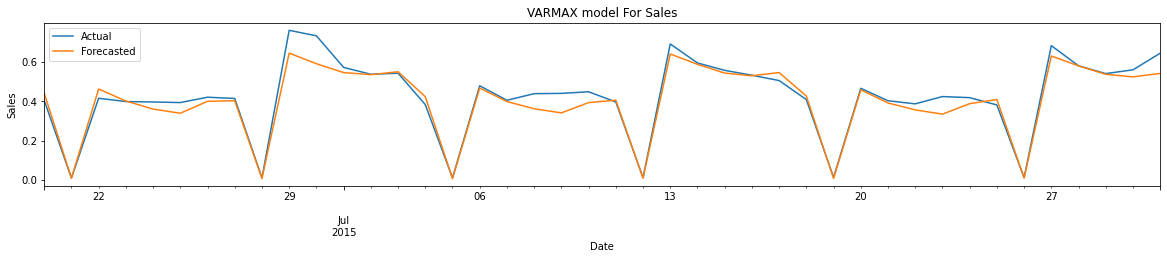

In [103]:
# Plotting time series

forecasted_timeseries_visualization(df_train_all_test['Sales'],df_train_all_test['VarmaxForecastedSales'],'Sales','VARMAX')

In [104]:
# Printing results

d=summary(df_train_all_test['Sales'], df_train_all_test['VarmaxForecastedSales'],
       df_train_all_test['Customers'], df_train_all_test['VarmaxForecastedCustomers'],'All','VARMAX')
summary_df = pd.concat([summary_df, d])
summary_df.head()

,Store,Model,RMSE_SALES,MAPE_SALES,RMSE_CUSTOMERS,MAPE_CUSTOMERS
0,All,VAR,0.05,20.11,0.03,9.19
0,All,VARMAX,0.05,9.48,0.03,8.33
